<a href="https://colab.research.google.com/github/parveen180/Machine-learning-project-python/blob/main/shell_v_s_pebble_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
! kaggle datasets download -d vencerlanz09/shells-or-pebbles-an-image-classification-dataset


Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/shells-or-pebbles-an-image-classification-dataset
License(s): CC-BY-SA-4.0
 96% 187M/195M [00:01<00:00, 162MB/s]
100% 195M/195M [00:01<00:00, 193MB/s]


In [4]:
!ls

kaggle.json  sample_data  shells-or-pebbles-an-image-classification-dataset.zip


In [5]:
from zipfile import ZipFile
filename='/content/shells-or-pebbles-an-image-classification-dataset.zip'
with ZipFile(filename,'r')as zip:
    zip.extractall()
    print('done')

done


In [6]:
import os

# Count files in the 'Shells' directory
path_shells, dirs_shells, files_shells = next(os.walk('/content/Shells'))
file_count_shells = len(files_shells)
print(f"Number of files in Shells: {file_count_shells}")

# Count files in the 'Pebbles' directory
path_pebbles, dirs_pebbles, files_pebbles = next(os.walk('/content/Pebbles'))
file_count_pebbles = len(files_pebbles)
print(f"Number of files in Pebbles: {file_count_pebbles}")

Number of files in Shells: 1541
Number of files in Pebbles: 2743


In [7]:
filename_shells=os.listdir('/content/Shells')
print(filename_shells)

['Shells (836).jpg', 'Shells (573).jpg', 'Shells (1150).jpg', 'Shells (1175).jpg', 'Shells (1412).jpg', 'Shells (402).jpg', 'Shells (329).jpg', 'Shells (216).jpg', 'Shells (938).jpg', 'Shells (393).jpg', 'Shells (94).jpg', 'Shells (1375).jpg', 'Shells (983).jpg', 'Shells (246).jpg', 'Shells (830).jpg', 'Shells (1170).jpg', 'Shells (711).jpg', 'Shells (284).jpg', 'Shells (1035).jpg', 'Shells (1181).jpg', 'Shells (289).jpg', 'Shells (871).jpg', 'Shells (1006).jpg', 'Shells (1440).jpg', 'Shells (340).jpg', 'Shells (1486).jpg', 'Shells (548).jpg', 'Shells (57).jpg', 'Shells (1031).jpg', 'Shells (530).jpg', 'Shells (1499).jpg', 'Shells (580).jpg', 'Shells (1229).jpg', 'Shells (1025).jpg', 'Shells (184).jpg', 'Shells (374).jpg', 'Shells (19).jpg', 'Shells (248).jpg', 'Shells (1399).jpg', 'Shells (1300).jpg', 'Shells (1138).jpg', 'Shells (547).jpg', 'Shells (875).jpg', 'Shells (196).jpg', 'Shells (761).jpg', 'Shells (234).jpg', 'Shells (869).jpg', 'Shells (878).jpg', 'Shells (1308).jpg', 'She

In [8]:
file_count = len(filename_shells)
print(file_count)

1541


In [9]:
filename_pebbles=os.listdir('/content/Pebbles')
print(filename_pebbles)

['Pebbles (1439).jpg', 'Pebbles (584).jpg', 'Pebbles (977).jpg', 'Pebbles (2096).jpg', 'Pebbles (68).jpg', 'Pebbles (2076).jpg', 'Pebbles (1395).jpg', 'Pebbles (172).jpg', 'Pebbles (2504).jpg', 'Pebbles (1970).jpg', 'Pebbles (2731).jpg', 'Pebbles (1392).jpg', 'Pebbles (67).jpg', 'Pebbles (1510).jpg', 'Pebbles (2214).jpg', 'Pebbles (1218).jpg', 'Pebbles (642).jpg', 'Pebbles (1458).jpg', 'Pebbles (1266).jpg', 'Pebbles (2057).jpg', 'Pebbles (1507).jpg', 'Pebbles (2686).jpg', 'Pebbles (195).jpg', 'Pebbles (2325).jpg', 'Pebbles (1149).jpg', 'Pebbles (1803).jpg', 'Pebbles (2519).jpg', 'Pebbles (2139).jpg', 'Pebbles (2299).jpg', 'Pebbles (2122).jpg', 'Pebbles (508).jpg', 'Pebbles (2194).jpg', 'Pebbles (2643).jpg', 'Pebbles (1028).jpg', 'Pebbles (2463).jpg', 'Pebbles (2502).jpg', 'Pebbles (2727).jpg', 'Pebbles (812).jpg', 'Pebbles (56).jpg', 'Pebbles (887).jpg', 'Pebbles (2197).jpg', 'Pebbles (2714).jpg', 'Pebbles (174).jpg', 'Pebbles (365).jpg', 'Pebbles (1560).jpg', 'Pebbles (1583).jpg', 'Pe

In [10]:
# Assuming you want to count the number of files in the list:
file_count = len(filename_pebbles)
print(file_count)

2743


In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

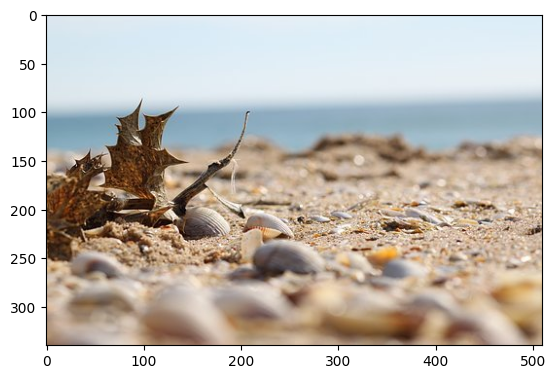

In [12]:
img=mpimg.imread('/content/Shells/Shells (836).jpg')
plt.imshow(img)
plt.show()

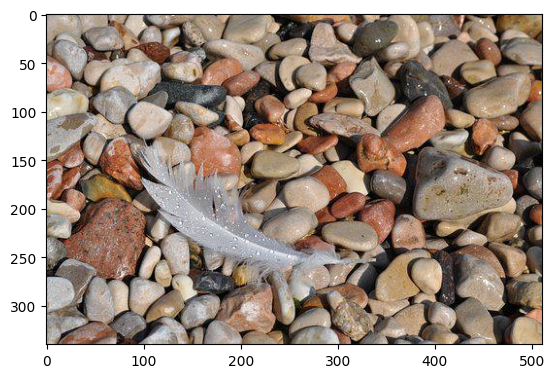

In [13]:
img=mpimg.imread('/content/Pebbles/Pebbles (584).jpg')
plt.imshow(img)
plt.show()

In [14]:
file_names=os.listdir('/content/Pebbles')

for i in range(5):
    name=file_names[i]
    print(name[0:6])

Pebble
Pebble
Pebble
Pebble
Pebble


In [15]:
file_names=os.listdir('/content/Shells')

for i in range(5):
    name=file_names[i]
    print(name[0:5])

Shell
Shell
Shell
Shell
Shell


In [16]:
os.mkdir('/content/resized_images')

In [17]:
original_folder='/content/Pebbles'
resized_image_folder='/content/resized_images'

for i in range(len(filename_pebbles)):
    file_name=filename_pebbles[i]
    img_path=os.path.join(original_folder,file_name)

    # Check if the path is a file and not a directory
    if os.path.isfile(img_path):
      try:
          img=Image.open(img_path)
          img=img.resize((224,224))
          img=img.convert('RGB')

          # Construct the new image path
          newImgPath = os.path.join(resized_image_folder, file_name)

          img.save(newImgPath)
      except Exception as e:
          print(f"Could not process file {file_name}: {e}")

In [18]:
original_folder='/content/Shells'
resized_image_folder='/content/resized_images'

for i in range(len(filename_shells)):
    file_name=filename_shells[i]
    img_path=os.path.join(original_folder,file_name)

    # Check if the path is a file and not a directory
    if os.path.isfile(img_path):
      try:
          img=Image.open(img_path)
          img=img.resize((224,224))
          img=img.convert('RGB')

          # Construct the new image path
          newImgPath = os.path.join(resized_image_folder, file_name)

          img.save(newImgPath)
      except Exception as e:
          print(f"Could not process file {file_name}: {e}")

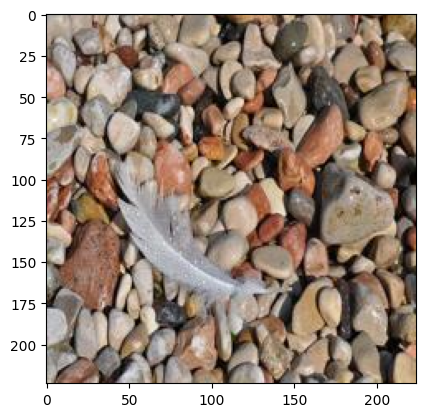

In [19]:
img=mpimg.imread('/content/resized_images/Pebbles (584).jpg')
imgplot=plt.imshow(img)
plt.show()

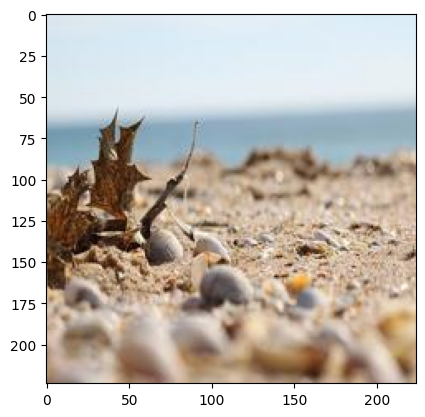

In [20]:
img=mpimg.imread('/content/resized_images/Shells (836).jpg')
imgplot=plt.imshow(img)
plt.show()

In [21]:
filename=os.listdir('/content/resized_images/')
labels=[]
for i in range(len(filename)):
    if filename[i][0:6]=='Pebble':
        labels.append(0)
    else:
        labels.append(1)

In [22]:
print(filename[0:5])
print(len(filename))

['Shells (836).jpg', 'Pebbles (1439).jpg', 'Shells (573).jpg', 'Pebbles (584).jpg', 'Pebbles (977).jpg']
4284


In [23]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 0, 0]
4284


In [24]:
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[2743 1541]


In [25]:
import cv2
import glob

In [26]:
image_directory = '/content/resized_images/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [27]:
x=dog_cat_images
y=np.asarray(labels)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train=x_train/255
x_test=x_test/255

In [30]:
import tensorflow as tf
import tensorflow_hub as hub

In [31]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [32]:
import tf_keras

In [33]:
num_of_classes = 2

model = tf_keras.Sequential([

    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [34]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(x_train, y_train, epochs=5)

In [ ]:
score, acc = model.evaluate(x_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

In [ ]:
input_image_path=input()
input_image=cv2.imread(input_image_path)
cv2.imshow(input_image)
input_image=cv2.resize(input_image,(224,224))
input_image=input_image/255
input_image=np.reshape(input_image,(1,224,224,3))
prediction=model.predoct(input_image)
print(prediction)
prediction=np.argmax(prediction)
print(prediction)
if prediction==0:
    print('Pebble')
else:
    print('Shell')
